In [3]:
############################################### IMPORT MODULES ###############################################

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt

import scipy as sci
from scipy import integrate
from scipy import optimize
from scipy.optimize import curve_fit
import math

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
from IPython.display import HTML

import importlib
import timeit
import time

import zerofunctions3 as z
import finalfunctions2 as f
import PERMmain as p
importlib.reload(p)

<module 'PERMmain' from '/home/student/PERMmain.py'>

In [4]:
################################################# PARAMETERS & INITIALIZATION #############################################
N=1                            # number of polymers
L=250                          # number of beads per polymer
dim=2                          # dimensions (2D)
d=1                            # distance between the beads
k_b=1                          # boltzmann constant
T=25                           # temperature 
eps=0.25                       # value for epsilon in lennard jones
sigma=0.8                     # value for sigma in lennard jones
Ntheta= 6                      # number of divisions of theta
alpha1= 1.2                    # lower limit
alpha2= 2.2                      # upper limit

Elapsed time in seconds: 0.11749935150146484


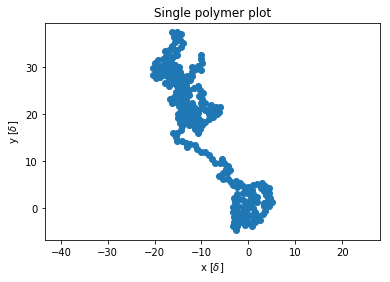

The bead no. and end-to-end distance of this polymer is 250 33.3534725701


In [5]:
################################## VISUALIZATION  #####################################
start = time.time()
(position, e2e, W) = p.perm(L)
elapsed_time = time.time() - start
print("Elapsed time in seconds:", elapsed_time)
istop=L
plt.plot(position[:istop,0], position[:istop,1], '-o')
plt.title('Single polymer plot')
plt.axis('equal')
plt.xlabel('x [$\delta$]')
plt.ylabel('y [$\delta$]')
plt.show()
print("The bead no. and end-to-end distance of this polymer is", istop, e2e[-1])


In [6]:
################################## ACQUIRING DATA #####################################

min = 2
max = 250
repeat = 100

start = time.time()

### End-to-end distance ###

def ensemble(min, max, repeat):
    """
    function: creates an ensemble of (max * repeat) polymers for various (pre-fixed) lengt varying from 2 to 250 beads.
    Input: maximum length, repetition
    Output: end-to-end distances
    """   
    
    ldata, e2edata, weightdata, meane2e = z.zeromatrices_e2e(min, max, repeat)

    for j in range(repeat):
        position, e2edata[:,j], weightdata[:,j] = p.perm(max-1)
            
    meane2e = f.calc_mean(e2edata, weightdata)
    stde2e = f.calc_std(e2edata, weightdata)
 
            
    return e2edata, weightdata, meane2e, stde2e
   
e2edata, weightdata, meane2e, stde2e = ensemble(min, max, repeat)
e2edata = np.nan_to_num(e2edata)

### Least-square fit ###

N3 = np.linspace(2,max-min+2,max-3)
opt, cov, perr = f.fitting(N3, meane2e, min, max)

print("The optimal fitting parameter for a and b are", opt)
print("With standard deviations", perr)


### Elapsed time ###

elapsed_time = time.time() - start
print("Elapsed time in seconds:", elapsed_time)

The optimal fitting parameter for a and b are [ 1.31972862  0.57166695]
With standard deviations [ 0.02760323  0.0041218 ]
Elapsed time in seconds: 8.49676513671875


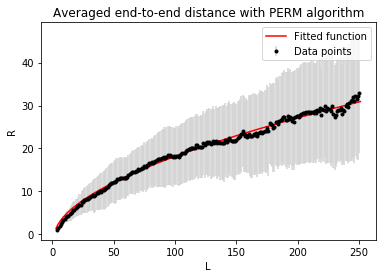

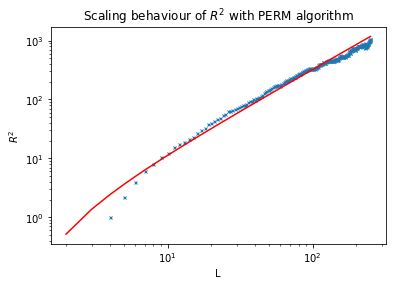

In [7]:
################################## VISUALIZATION #####################################

def makeplot(min, max):
    """
    function: plots the end-to-end distance for various (pre-fixed) lengt varying from 2 to 250 beads 
    and plots the least squares fit 
    input: R(L)
    """   
    
    N3 = np.linspace(2,max-min+2,max-3)
    plt.plot(N3+1, f.function(N3, *opt), 'r-',label='Fitted function')
    
    
    N2 = np.linspace(2,max,max-1)
    plt.errorbar(N2, meane2e, yerr = stde2e, label='Data points',fmt='.k', ecolor='lightgray')
    plt.title('Averaged end-to-end distance with PERM algorithm')
    plt.xlabel('L')
    plt.ylabel('R')
    plt.legend()
    plt.show()
    
    return opt, cov
                
makeplot(min, max)

def makeplotlog(min, max):
    """
    function: plots the end-to-end distance on a semi-log scale
    input: squared end-to-end length (R^2) 
    """  
    e2esquared = np.square(meane2e)
    N2 = np.linspace(2,max,max-1)
    N3 = np.linspace(2,max-min+2,max-3)
    plt.plot(N2, e2esquared,'x',markersize=3)
    
    theoryline =(0.72 * (N3-1)**0.7)**2
    
    plt.plot(N3, theoryline, 'r-',label='fitted function')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('$R^2$')
    plt.xlabel('L')
    plt.title('Scaling behaviour of $R^2$ with PERM algorithm')
    plt.show()
    
makeplotlog(min,max)